In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
df = pd.read_csv("Electric_Vehicle_Population_By_County.csv")

In [30]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[df['Date'].notnull()]
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Convert numeric columns
numeric_cols = ['Battery Electric Vehicles (BEVs)',
                'Plug-In Hybrid Electric Vehicles (PHEVs)',
                'Electric Vehicle (EV) Total',
                'Non-Electric Vehicle Total',
                'Total Vehicles']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


In [31]:
Q1 = df['Percent Electric Vehicles'].quantile(0.25)
Q3 = df['Percent Electric Vehicles'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Percent Electric Vehicles'] = np.clip(df['Percent Electric Vehicles'], lower_bound, upper_bound)


C:\Users\srija\AppData\Local\Temp\ipykernel_7960\1662068852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, palette='viridis')


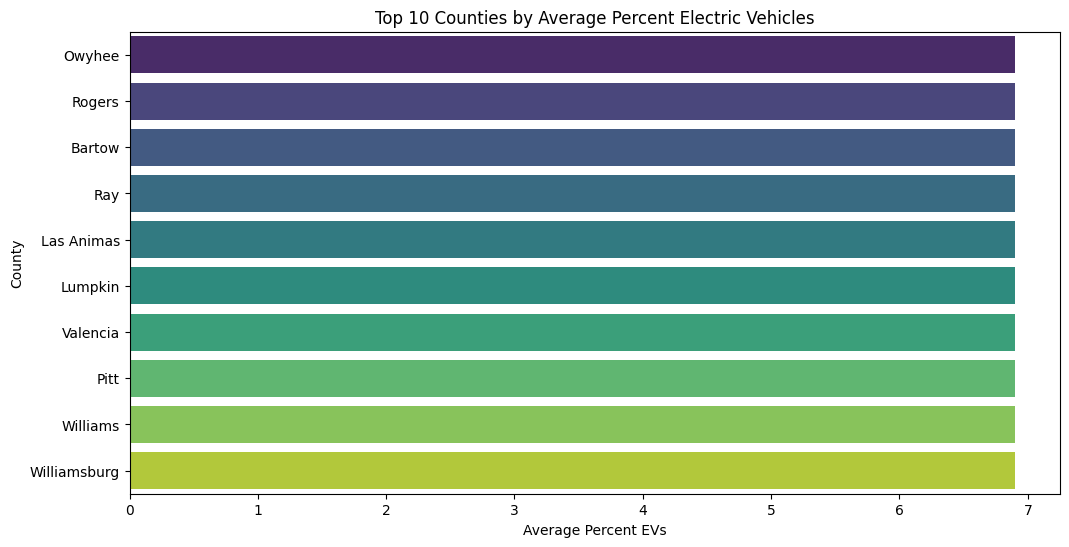

In [32]:
top_counties = df.groupby('County')['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.values, y=top_counties.index, palette='viridis')
plt.title('Top 10 Counties by Average Percent Electric Vehicles')
plt.xlabel('Average Percent EVs')
plt.ylabel('County')
plt.show()

In [33]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Encode categorical features
df = pd.get_dummies(df, columns=['County', 'State', 'Vehicle Primary Use'], drop_first=True)


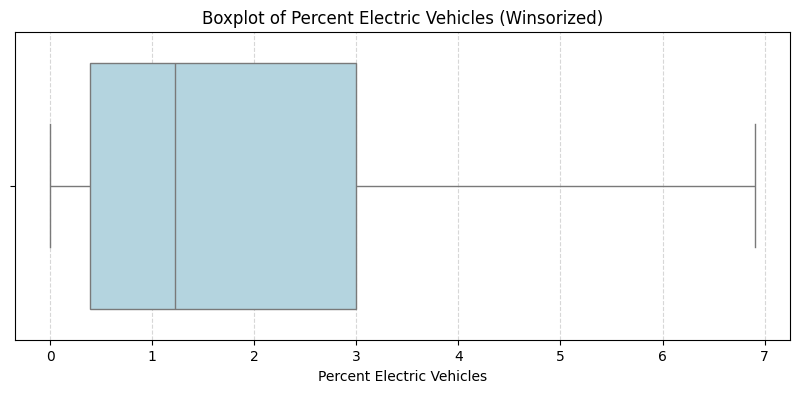

In [34]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Percent Electric Vehicles'], color='lightblue')
plt.title('Boxplot of Percent Electric Vehicles (Winsorized)')
plt.xlabel('Percent Electric Vehicles')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [35]:
X = df.drop(columns=['Date', 'Percent Electric Vehicles', 
                     'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
                     'Total Vehicles'])
y = df['Percent Electric Vehicles']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Random Forest Regressor Performance:
MAE: 0.0635
RMSE: 0.2324
R^2 Score: 0.9898
